# Traitement des données Theophile

---

Théophile est un petit garçon français né le 04 juillet 2005. Son père est cadre supérieur dans une entreprise et sa mère est violoniste. Il est bricoleur, curieux et constamment en quête de nouvelles expériences. Au moment des premiers enregistrements, Théophile était encore enfant unique.

Aliyah Morgenstern a commencé à le filmer alors qu’il n’avait que sept mois et elle continue actuellement à se rendre régulièrement chez lui afin de collecter des enregistrements en situation naturelle. Son corpus longitudinal montre que le développement langagier de Théophile n’est pas rapide. En effet, à 2;01 son répertoire lexical est restreint et prend souvent la forme de réduplications onomatopéiques. Toutefois son langage présente déjà quelques marques morphologiques comme celle du participe passé : « boum » et « boumé » pour « tombe » et « tombé ». Si au début du corpus, son langage se développait plus lentement que celui de Madeleine ou Léonard, à 5 ans, il est devenu un grand bavard plein d’humour qui aime raconter des histoires et faire des blagues et aime jouer avec son petit frère de deux ans son cadet et sa toute petite soeur.

# Nettoyage 

## Chargement des données

Récupèrer la liste des noms de fichier pour Theophile :
* Ces fichiers sont placés dans un repertoire 'data/theophile_texte'
* Ils sont issuent d'une extraction sur le site colaje au format chat
* Nous les avons transformés en format .txt afin de pouvoir les traiter avec python

In [1]:
import os 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import chardet

In [2]:
print(os.getcwd())
os.chdir('/Users/marine/Desktop/Projet_TER/data/theophile_texte')
listing=os.listdir() # On crée une liste de tout les noms des fichiers

/Users/marine/Desktop/Projet_TER/TER/utilitaires


In [3]:
listing.sort()
listing

['.DS_Store',
 'THEOPHILE-06-1_00_09.txt',
 'THEOPHILE-07-1_01_14.txt',
 'THEOPHILE-08-1_02_10.txt',
 'THEOPHILE-09-1_03_02.txt',
 'THEOPHILE-10-1_04_01.txt',
 'THEOPHILE-11-1_05_05.txt',
 'THEOPHILE-12-1_06_08.txt',
 'THEOPHILE-13-1_07_01.txt',
 'THEOPHILE-14-1_08_08.txt',
 'THEOPHILE-15-1_09_06.txt',
 'THEOPHILE-16-1_10_00.txt',
 'THEOPHILE-17-1_11_07.txt',
 'THEOPHILE-18-1_11_25.txt',
 'THEOPHILE-19-2_00_20.txt',
 'THEOPHILE-20-2_02_08.txt',
 'THEOPHILE-21-2_03_01.txt',
 'THEOPHILE-22-2_04_05.txt',
 'THEOPHILE-23-2_04_29.txt',
 'THEOPHILE-24-2_06_03.txt',
 'THEOPHILE-25-2_07_04.txt',
 'THEOPHILE-26-2_07_28.txt',
 'THEOPHILE-27-2_09_07.txt',
 'THEOPHILE-28-2_10_01.txt',
 'THEOPHILE-29-2_10_28.txt',
 'THEOPHILE-30-2_11_28.txt',
 'THEOPHILE-31-3_02_00.txt',
 'THEOPHILE-32-3_03_02.txt',
 'THEOPHILE-33-3_04_10.txt',
 'THEOPHILE-34-3_05_11.txt',
 'THEOPHILE-35-3_06_10.txt',
 'THEOPHILE-36-3_07_08.txt',
 'THEOPHILE-37-3_08_15.txt',
 'THEOPHILE-38-3_10_00.txt',
 'THEOPHILE-39-3_11_15.txt',


In [4]:
del listing[0] # pour retirer '.DS_Store'
len(listing)

39

Nous avons 39 fichiers pour Theophile, chacun de ses fichiers corresepondent aux retrancriptions d'un enregistrement vidéo.


## Lecture des données

* Définir le nom des colonnes selon le fichier final attendu
* Lire chaque fichier de la liste 
* Ajouter les colonnes nom de l'enfant et son age
* La colonne age identifie de manière unique l'enregistrement

In [5]:
d = {} # Le dictionnaire contenant les noms des fichiers
nom_col = ['type', 'seconde_debut', 'seconde_fin', 'contenu']
rows = 0 #Compteur de ligne pour vérifier la perte de données

for file in listing: 
    d[file]=pd.read_csv(file, 
                        sep = '\t', 
                        names = nom_col, 
                        header = None)  

    # On ajoute le nom de l'enfant
    nom_pos1 = 0
    nom_pos2 = file.find('-')
    nom = file[nom_pos1:nom_pos2]
    d[file]['enfant'] = nom
    
    # On ajoute l'age de l'enfant
    age_pos1 = file.find('_')-1
    age_pos2 = file.find('.')
    age = file[age_pos1:age_pos2]
    d[file]['age'] = age
    
    rows += len(d[file])
    
    
# DataFrame contenant toutes les lignes de l'enfant
data = pd.concat([d[file] for file in listing], 
                 sort=False,
                 ignore_index=True) 

In [6]:
data.shape

(109085, 6)

## Vérification de la perte de données

On vérifie qu'il y a autant de ligne lu (variable rows) que de ligne écritent (len(data))

In [7]:
print(rows == len(data))

True


## Ordre des colonnes

In [8]:
data=data[['enfant', 'age','type', 'seconde_debut', 'seconde_fin', 'contenu']]
data.head()

,enfant,age,type,seconde_debut,seconde_fin,contenu
0,THEOPHILE,1_00_09,+div+,0.0,3701.0,div |
1,THEOPHILE,1_00_09,+div+,0.0,23.0,div |
2,THEOPHILE,1_00_09,OBS,0.0,3.0,alors Théophile a un an .
3,THEOPHILE,1_00_09,FAT,3.0,6.0,++ un an et une semaine .
4,THEOPHILE,1_00_09,act,NaN,NaN,FAT met la couche à CHI.


## Création du fichier final format csv

In [9]:
# Création du fichier enfant
os.chdir('/Users/marine/Desktop/Projet_TER/TER/data')
data.to_csv('data_theophile_final.csv',
           encoding = 'utf-8',
           sep = '\t',
           header = True)

On peut maintenant utiliser le fichier 'data_theophile_finale.csv' pour l'exploration de données.

## Lecture fichier final

In [10]:
data_theophile = pd.read_csv('data_theophile_final.csv',
                           sep = '\t',
                           encoding = 'utf-8',
                           index_col=False)

# On supprime la colonne qui duplique les index
data_theophile = data_theophile.drop(columns = 'Unnamed: 0')

In [11]:
data_theophile

,enfant,age,type,seconde_debut,seconde_fin,contenu
0,THEOPHILE,1_00_09,+div+,0.0,3701.0,div |
1,THEOPHILE,1_00_09,+div+,0.0,23.0,div |
2,THEOPHILE,1_00_09,OBS,0.0,3.0,alors Théophile a un an .
3,THEOPHILE,1_00_09,FAT,3.0,6.0,++ un an et une semaine .
4,THEOPHILE,1_00_09,act,NaN,NaN,FAT met la couche à CHI.
5,THEOPHILE,1_00_09,CHI,6.0,8.0,0 .
6,THEOPHILE,1_00_09,act,NaN,NaN,CHI regarde OBS
7,THEOPHILE,1_00_09,OBS,8.0,16.0,on est le treize juillet .
8,THEOPHILE,1_00_09,FAT,16.0,23.0,c'est son deuxième quatorze juillet .
9,THEOPHILE,1_00_09,-div-,NaN,NaN,div |


# Exploration des données

---

Qu'elles sont les différents type de ligne ?

In [12]:
print(len(data_theophile['type'].unique()))

40


Il existe 40 types de ligne dans les fichiers Theophile :

In [13]:
print(sorted(data_theophile['type'].unique()))

['+div+', '-div-', 'ADU', 'ANT', 'BRO', 'CAM', 'CAM2', 'CHI', 'FAT', 'FRI', 'GDF', 'GDM', 'GIR', 'MOT', 'OBS', 'SAR', 'STU', 'UNC', 'UNI', 'VIS', 'YON', 'act', 'add', 'alt', 'com', 'exp', 'fac', 'gpx', 'int', 'mod', 'pho', 'sit', 'xadr', 'ximi', 'xnpt', 'xpho', 'xpnt', 'xpnte', 'xpol', 'xpt']


### Valeurs NaN

In [14]:
data_theophile.loc[data_theophile['contenu'].isna()]

,enfant,age,type,seconde_debut,seconde_fin,contenu
62294,THEOPHILE,2_10_28,pho,NaN,NaN,NaN


Il existe une valeur NaN dans la colonne contenu, nous allons la supprimer :

In [15]:
data_theophile = data_theophile.dropna(subset=['type', 'contenu'])

## Les phonèmes

Les lignes de type 'pho' correspondent à la traduction phonétique lorsque Theophile s'exprime :
* Nous avons à disposition 15329 traductions pour Theophile
* On distingue les premiers mots de Theophile à l'age d'un an et 9 jours
* Les traductions s'arrêtent à l'age de 4 ans 11 mois et 11 jours

In [16]:
pho_theophile = data_theophile[data_theophile['type'] == 'pho']
pho_theophile

,enfant,age,type,seconde_debut,seconde_fin,contenu
11,THEOPHILE,1_00_09,pho,NaN,NaN,œː
27,THEOPHILE,1_00_09,pho,NaN,NaN,oːœː
34,THEOPHILE,1_00_09,pho,NaN,NaN,mː mː
38,THEOPHILE,1_00_09,pho,NaN,NaN,a aːgœː agy mː aː
41,THEOPHILE,1_00_09,pho,NaN,NaN,aː
47,THEOPHILE,1_00_09,pho,NaN,NaN,bɛː
51,THEOPHILE,1_00_09,pho,NaN,NaN,mːmmː
58,THEOPHILE,1_00_09,pho,NaN,NaN,iː
63,THEOPHILE,1_00_09,pho,NaN,NaN,œgøː
65,THEOPHILE,1_00_09,pho,NaN,NaN,œː


In [17]:
#theo = data_theophile['type'].unique()
#theo.sort()
#type_theophile = {}
#for file in theo:
#    type_theophile[file] = len(data_theophile[data_theophile['type'] == file])
#type_theophile

Nous allons chercher à visualiser la quantité phonétique de données à disposition

## Visualisation des données phonétiques

### Ajout des colonnes 'année', 'mois' et 'jour'

On considère que la colonne age a pout format : x_xx_xx (année_mois_jour) ainsi :
* ``pho_theophile['age'][0:1]`` nous donne le nombre d'année
* ``pho_theophile['age'][2:4]`` nous donne le nombre de mois
* ``pho_theophile['age'][5:7]`` nous donne le nombre de jours

In [18]:
# Ajout du nombre d'année
année_pho_theophile = pho_theophile.apply(lambda row: row['age'][0:1], axis=1)
pho_theophile['année'] = année_pho_theophile

# Ajout du nombre de mois
mois_pho_theophile = pho_theophile.apply(lambda row: row['age'][2:4], axis=1)
pho_theophile['mois'] = mois_pho_theophile

# Ajout du nombre de jour
jour_pho_theophile = pho_theophile.apply(lambda row: row['age'][5:7], axis=1)
pho_theophile['jour'] = jour_pho_theophile

In [19]:
#pho_theophile

## Quantité de données

Combien avons-nous de ligne pour chaque année ? mois ? jour ?

### Quantité de données par année

In [20]:
nb_phrase_annee = pho_theophile[{'année','contenu'}].groupby('année').count()
nb_phrase_annee.rename(columns={'contenu': 'nb_phrase'})

,nb_phrase
année,
1,3100
2,5365
3,4301
4,2562


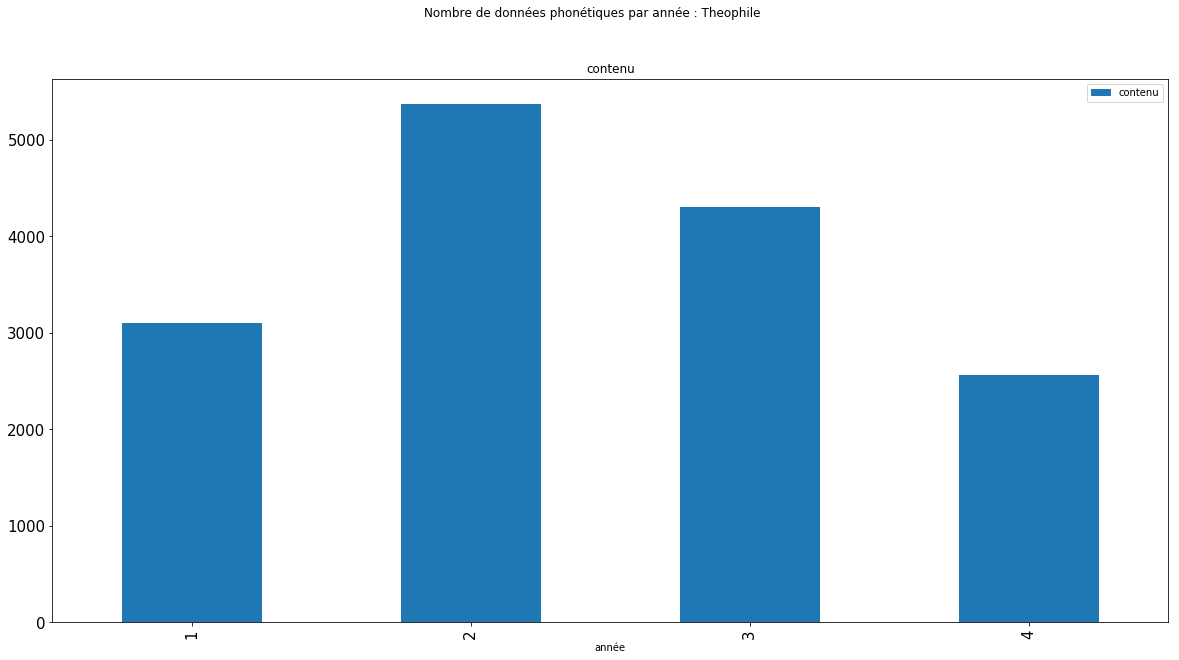

In [21]:
nb_phrase_annee.plot(kind='bar', 
                       subplots=True, 
                       figsize=(20,10),
                       title = 'Nombre de données phonétiques par année : Theophile',
                       fontsize = 15,
                       use_index = True);

On note une croissance en cloche avec un pic de données phonétiques à l'age de 2 ans

### Quantité de données par mois

Regardons plus en détail la quantité de données phonétiques par mois :

In [22]:
nb_phrase_mois = pho_theophile[{'année','mois','contenu'}].groupby(['année','mois']).count()
nb_phrase_mois = nb_phrase_mois.rename(columns={'contenu': 'nb_phrase'})
nb_phrase_mois.unstack(level=1)

nb_phrase                                                          \
mois         00     01     02     03     04     05     06     07     08   
année                                                                     
1         217.0  195.0  345.0  226.0  160.0  359.0  511.0  328.0  141.0   
2         269.0    NaN  305.0  330.0  763.0    NaN  387.0  839.0    NaN   
3           NaN    NaN  713.0  487.0  447.0  546.0  107.0  464.0  351.0   
4           NaN  473.0    NaN  671.0    NaN    NaN  717.0    NaN    NaN   

                             
mois      09      10     11  
année                        
1      193.0   145.0  280.0  
2      581.0  1440.0  451.0  
3        NaN   668.0  518.0  
4      570.0     NaN  131.0

On note qu'il y a des mois sans données, dès l'âge de 2 ans.<br>
Il manque :
* 3 enregistrements durant sa 2eme année et 3eme année,
* 7 enregistrements durant sa 4eme année.

Cela explique qu'il y ait moins de données phonétiques lorsque Théophile a 4 ans.

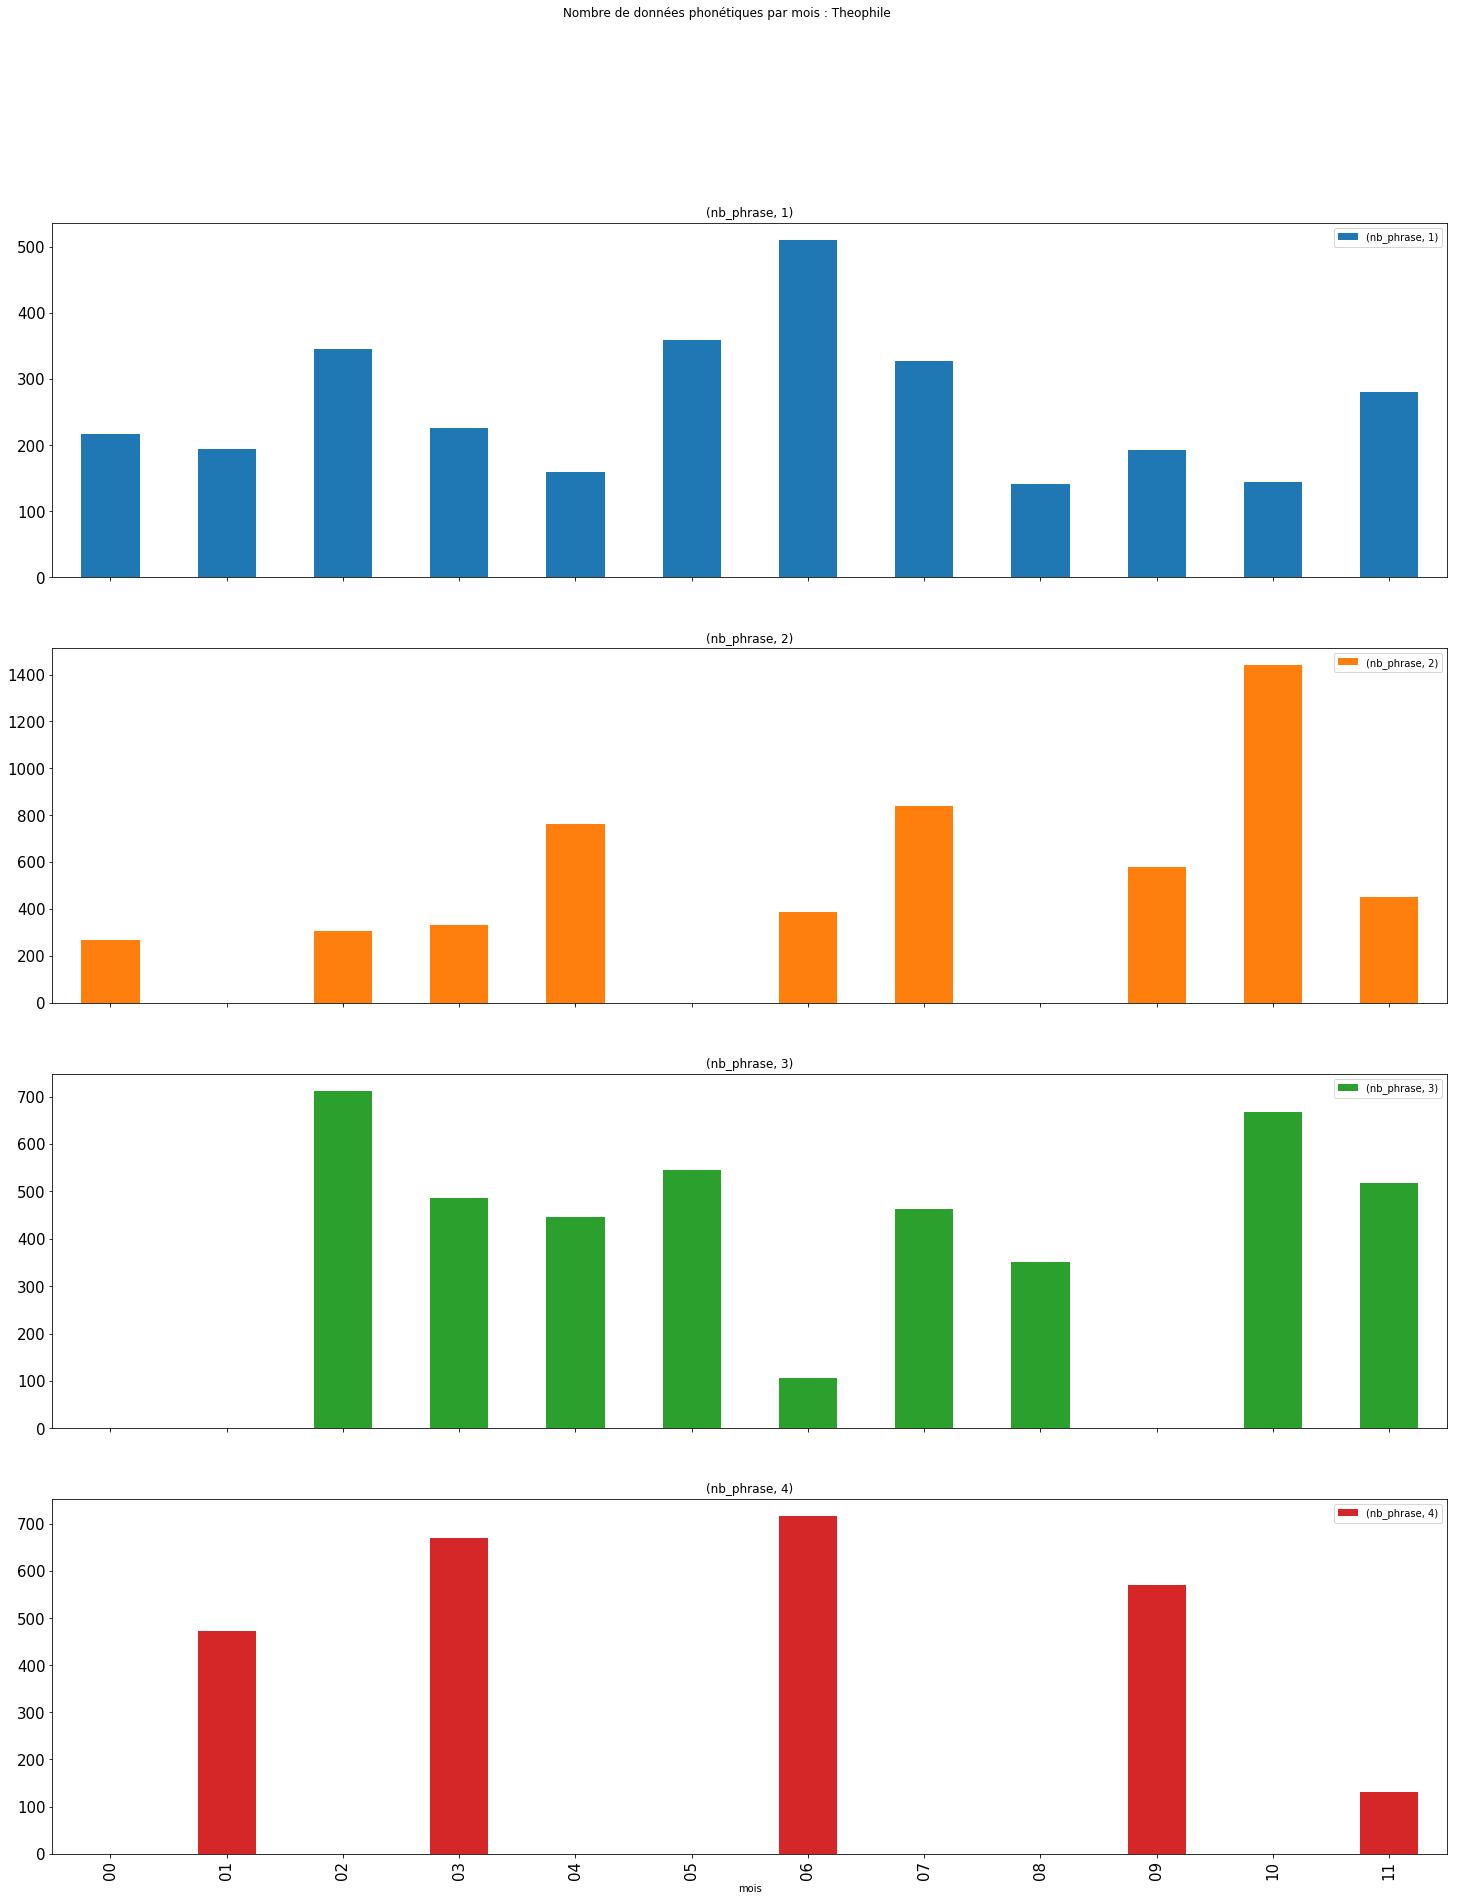

In [23]:
plt = nb_phrase_mois.unstack(level=0).plot(kind='bar', 
                                     subplots=True, 
                                     figsize=(25, 30),
                                     title = 'Nombre de données phonétiques par mois : Theophile',
                                     fontsize = 15,
                                     use_index = True)

L'enfant semble ne pas être tres bavard.

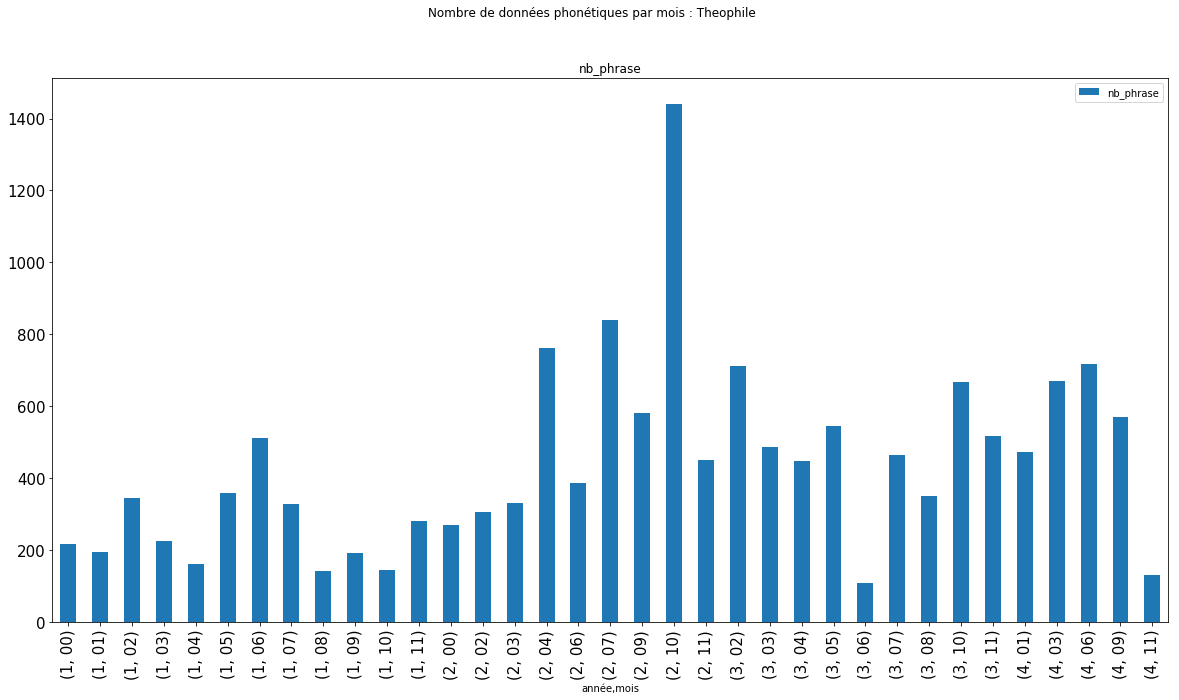

In [24]:
plt = nb_phrase_mois.plot(kind='bar',
                    subplots=True, 
                    figsize=(20, 10),
                    title = 'Nombre de données phonétiques par mois : Theophile',
                    fontsize = 15,
                    use_index = True)

Cette visualisation regroupe toutes les informations commentées ci-dessus.<br>
On note tout de même que l'enregistrement lorsque Théophile a 2 ans et 10 mois se détache des autres par la quantité phonétique à qu'il possède.

### Quantité de données par jour

Regardons maintenant la quantité de données par jours :

In [25]:
nb_phrase_jour = pho_theophile[{'année','mois', 'jour', 'contenu'}].groupby(['année','mois', 'jour']).count()
nb_phrase_jour = nb_phrase_jour.rename(columns={'contenu': 'nb_phrase'})
nb_phrase_jour

nb_phrase
année mois jour           
1     00   09          217
      01   14          195
      02   10          345
      03   02          226
      04   01          160
      05   05          359
      06   08          511
      07   01          328
      08   08          141
      09   06          193
      10   00          145
      11   07          141
           25          139
2     00   20          269
      02   08          305
      03   01          330
      04   05          387
           29          376
      06   03          387
      07   04          435
           28          404
      09   07          581
      10   01          673
           28          767
      11   28          451
3     02   00          713
      03   02          487
      04   10          447
      05   11          546
      06   10          107
      07   08          464
      08   15          351
      10   00          668
      11   15          518
4     01   24          473
      03   29          671
      06   20          717
      09   07          570
      11   11          131

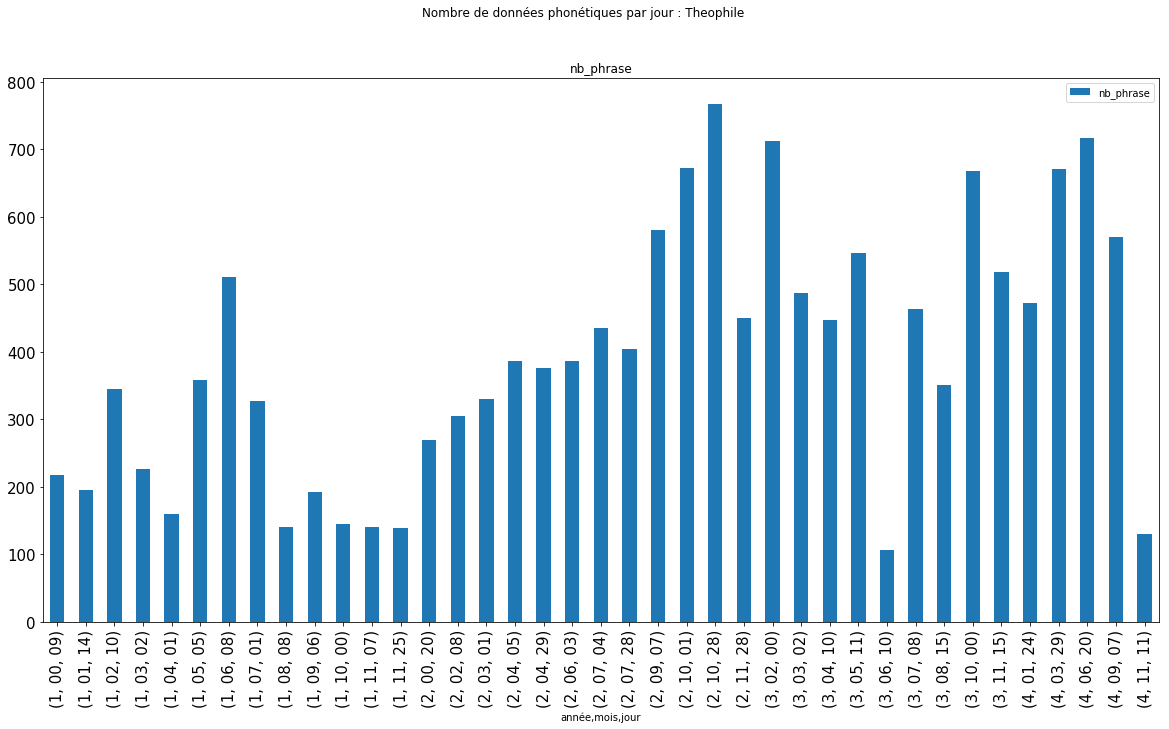

In [26]:
plt = nb_phrase_jour.plot(kind='bar',
                    subplots=True,
                    figsize=(20, 10),
                    title = 'Nombre de données phonétiques par jour : Theophile',
                    fontsize = 15,
                    use_index = True)

Ici nous avons découpé les données de tel sorte à avoir la quantité de données pour chaque enregistrement de Theophile. Mais les donnnées ne sont pas distribué de manière équitable dans le temps. On peut mesurer la croissance du nombre de prise de parole (on pourrait croiser cette donnée avec la durée de l'enregistrement pour une meilleure mesure).

On a maintenant une meilleure vision du nombre de la quantité de données phonétiques à disposition et de leur répartition dans le temps pour Theophile.

## Nombre de mot
Nous allons chercher à explorer le nombre de mot au sens phonétique par phrase. <br>
Pour cela on peut compter le nombre d'espace dans la chaîne de caractère :

In [27]:
# Exemple 
pho = pho_theophile.at[108517, 'contenu']
print('Nombre de mot dans "' + pho + ' : '+ str(pho.count(' ')+1))

Nombre de mot dans "ananː na nː amaja : 4


Pour chaque ligne on calcul le nombre de mot phonétique :

In [28]:
nb_mot_pho = pho_theophile.apply(lambda row: row['contenu'].count(' ')+1, axis=1)
pho_theophile['nombre_mot_phonétique'] = nb_mot_pho #On ajoute une colonne contenant le nombre de mot

Par exemple on peut avoir la phrase de Theophile avec le plus grand nombre de mot :

In [29]:
pho_theophile.loc[pho_theophile['nombre_mot_phonétique'] == pho_theophile['nombre_mot_phonétique'].max()].contenu.values


array(['ty a ɑ̃vij dəpɥi ty pø fɛʁ tu skə ty vø ty pø fɛʁ vɛso ty χ ty pø d ɛtʁ ty va d ɛtʁ ty pø d ɛ ty pø ɛtʁ ty pø ɛtʁ tʁɑ̃sfɔʁme tɔ̃ bato twa'],
      dtype=object)

Voici la ligne de cette phrase :

In [30]:
pho_theophile.loc[pho_theophile['nombre_mot_phonétique'] == pho_theophile['nombre_mot_phonétique'].max()]

,enfant,age,type,seconde_debut,seconde_fin,contenu,année,mois,jour,nombre_mot_phonétique
105883,THEOPHILE,4_09_07,pho,NaN,NaN,ty a ɑ̃vij dəpɥi ty pø fɛʁ tu skə ty vø ty pø ...,4,09,07,39


### Espérance de mot par phrase

In [31]:
mean_nb_mot_pho_theophile_jour = pho_theophile[{'année', 'mois', 'jour', 'nombre_mot_phonétique'}].groupby(['année', 'mois', 'jour']).mean()
mean_nb_mot_pho_theophile_jour = mean_nb_mot_pho_theophile_jour.rename(columns={'nombre_mot_phonétique': 'espérance_nombre_de_mot_phonétique'})
mean_nb_mot_pho_theophile_jour

espérance_nombre_de_mot_phonétique
année mois jour                                    
1     00   09                              1.391705
      01   14                              1.307692
      02   10                              1.489855
      03   02                              1.243363
      04   01                              1.218750
      05   05                              1.175487
      06   08                              1.025440
      07   01                              1.079268
      08   08                              1.361702
      09   06                              1.378238
      10   00                              1.331034
      11   07                              1.319149
           25                              1.496403
2     00   20                              1.665428
      02   08                              1.501639
      03   01                              2.160606
      04   05                              1.785530
           29                              1.864362
      06   03                              2.167959
      07   04                              2.222989
           28                              2.396040
      09   07                              2.662651
      10   01                              2.468053
           28                              2.971317
      11   28                              3.062084
3     02   00                              4.015428
      03   02                              4.211499
      04   10                              4.071588
      05   11                              4.249084
      06   10                              3.252336
      07   08                              4.665948
      08   15                              3.698006
      10   00                              5.094311
      11   15                              4.156371
4     01   24                              3.414376
      03   29                              4.551416
      06   20                              4.093445
      09   07                              4.866667
      11   11                              2.000000

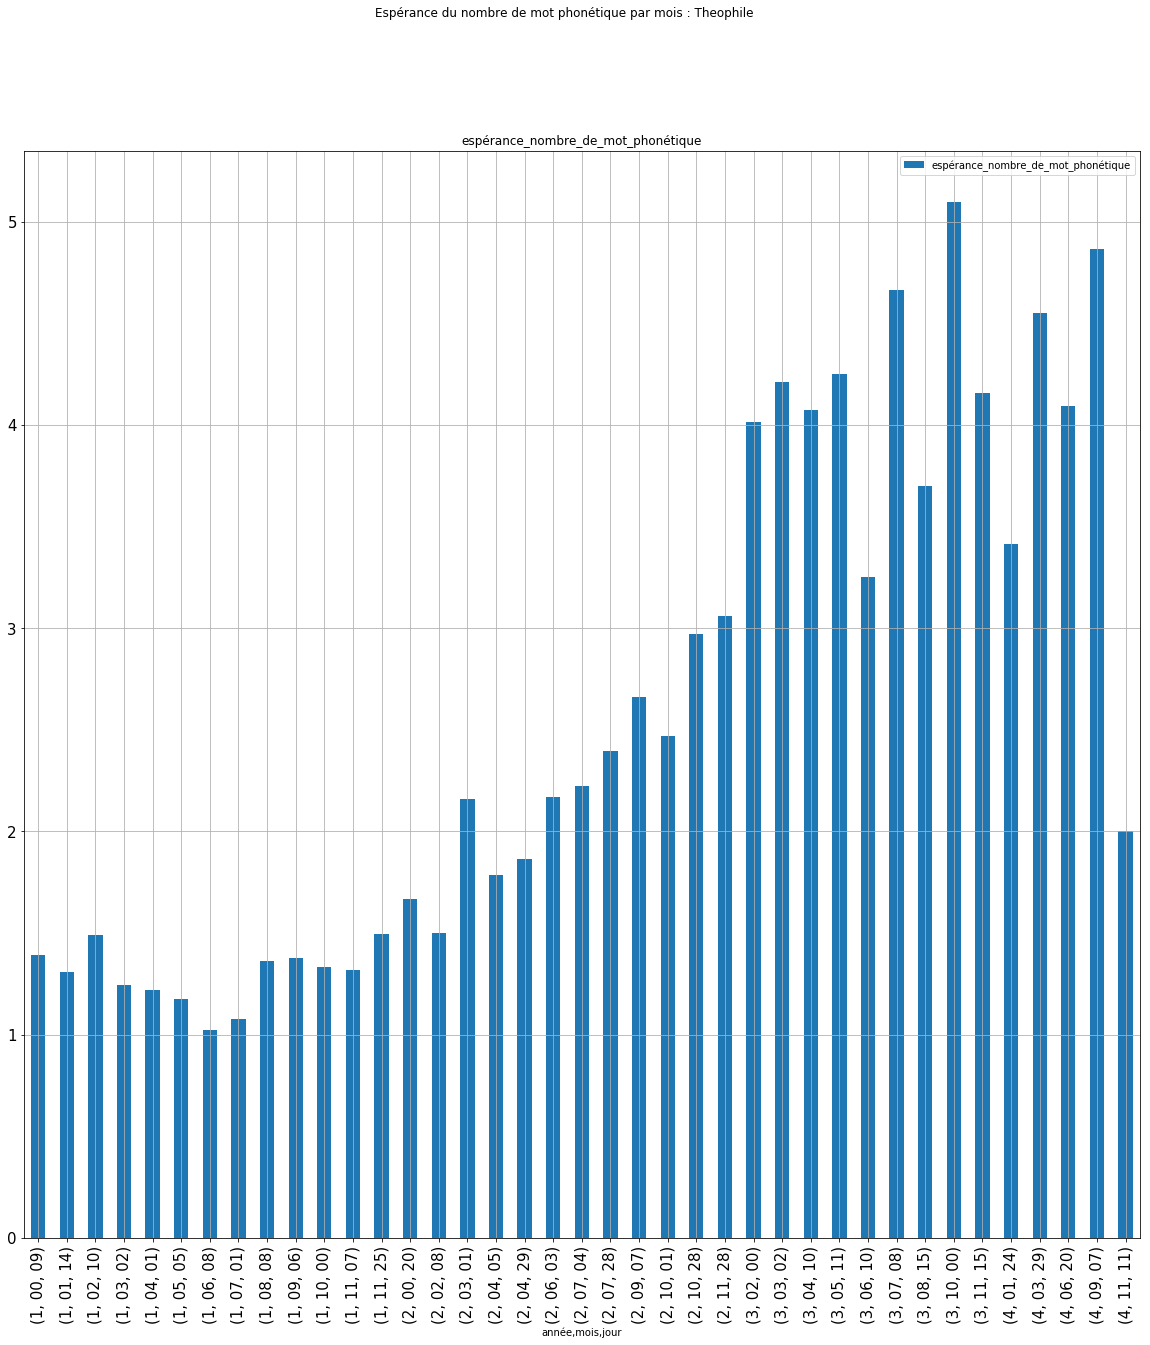

In [32]:
mean_nb_mot_pho_theophile_jour.plot(kind='bar', 
                            subplots=True, 
                            figsize=(20, 20),
                            title = 'Espérance du nombre de mot phonétique par mois : Theophile',
                            fontsize = 15,
                            use_index = True,
                            grid=True);

On constaste que l'espérance a tendance a augmenter au fil du temps a partir du moment où Theophile a 1 an 6 mois et 8 jours.

### Variance du nombre de mot par phrase

In [33]:
var_nb_mot_pho_theophile = pho_theophile[{'année','mois','nombre_mot_phonétique'}].groupby(['année','mois']).var()
var_nb_mot_pho_theophile = var_nb_mot_pho_theophile.rename(columns={'nombre_mot_phonétique': 'variance'})
var_nb_mot_pho_theophile.unstack(level=1)

variance                                                                \
mois         00        01        02         03        04        05         06   
année                                                                           
1      0.535672  0.657415  0.750624   0.407178  0.536753  0.290347   0.024842   
2      0.626450       NaN  0.882399   1.648899  1.349694       NaN   2.901769   
3           NaN       NaN  9.130380   8.883160  9.645088  8.312155   5.454594   
4           NaN  7.221996       NaN  16.373099       NaN       NaN  11.168630   

                                                            
mois          07        08         09         10        11  
année                                                       
1       0.091557  0.446809   0.725982   0.334100  0.428623  
2       2.270020       NaN   2.941172   3.156166  3.942804  
3      11.147348  9.639967        NaN  14.607284  7.938750  
4            NaN       NaN  19.131576        NaN  2.107692

### Plus grande phrase 

In [34]:
max_mot_pho_theophile = pho_theophile[{'année','mois','nombre_mot_phonétique'}].groupby(['année','mois']).max()
max_mot_pho_theophile = max_mot_pho_theophile.rename(columns={'nombre_mot_phonétique': 'longueur_max'})
max_mot_pho_theophile.unstack(level=1)

longueur_max                                                        \
mois            00    01    02    03    04    05    06    07    08    09   
année                                                                      
1              5.0   8.0   6.0   4.0   8.0   6.0   2.0   3.0   4.0   6.0   
2              6.0   NaN   7.0   9.0  12.0   NaN  16.0   9.0   NaN  11.0   
3              NaN   NaN  20.0  21.0  19.0  23.0  10.0  24.0  28.0   NaN   
4              NaN  27.0   NaN  34.0   NaN   NaN  22.0   NaN   NaN  39.0   

                   
mois     10    11  
année              
1       3.0   5.0  
2      13.0  12.0  
3      29.0  25.0  
4       NaN   7.0

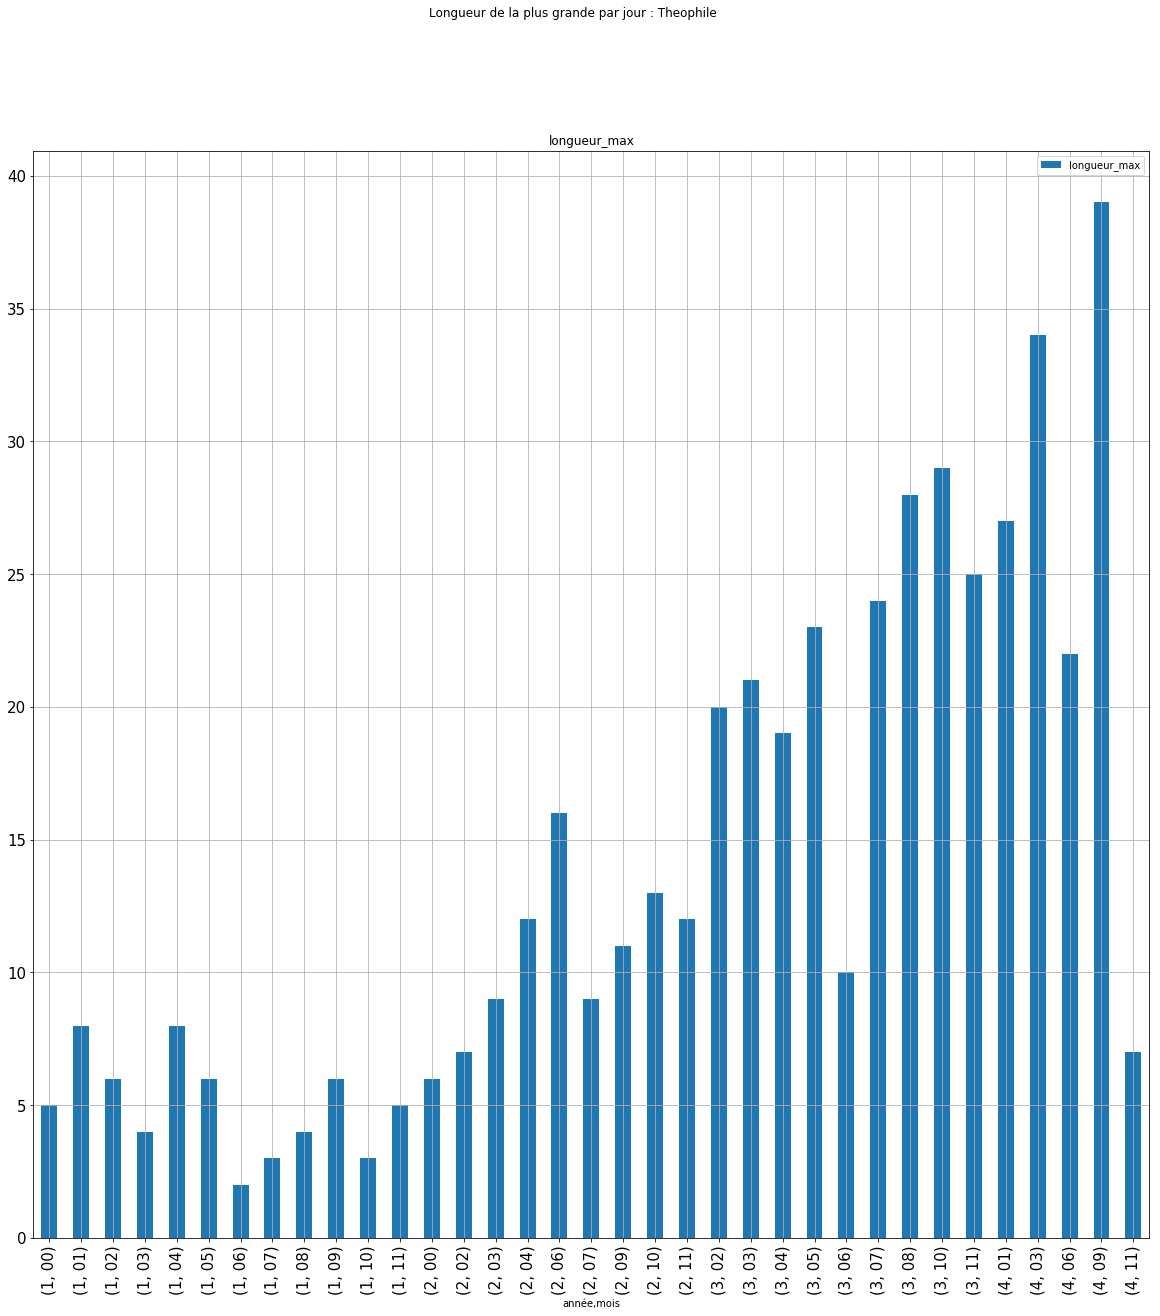

In [35]:
max_mot_pho_theophile.plot(kind='bar', 
                            subplots=True, 
                            figsize=(20, 20),
                            title = 'Longueur de la plus grande par jour : Theophile',
                            fontsize = 15,
                            use_index = True,
                            grid=True);

On note une que la longueur de la plus longue phrase par enregistrement fluctue. <br>
Remarque: le fait que l'enfant effectue une longue prhase signifie pas forcement que celle-ci a un sens